<a href="https://colab.research.google.com/github/stefaniemeliss/IADS_SC_2022_DecisionTrees/blob/main/RandomForest_IADS_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contents**

### 1. Implementation of Random Forest for Classification
### 2. Implementation of Random Forest for Regression






# 1. Classification


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset for Classification




> **Dataset:**  [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).



*   **Number of Instances:** 
    *   150 (50 in each of three classes)
*   **Number of Attributes:**
    *   4 numeric, predictive attributes and the class

*   **Attribute Information:**
    *   sepal length in cm
    *   sepal width in cm
    *   petal length in cm
    *   petal width in cm

*   **Classes:**
    *   Setosa (0)
    *   Versicolour (1)
    *   Virginica (2)
    






In [2]:
# Add liberaries 
from sklearn import datasets  # DATA
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import ensemble # To get Decision Tree 
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


from sklearn.tree import export_graphviz # exporting the tree structure as dot file
from pydotplus.graphviz import graph_from_dot_data # export png image from dot file
from IPython.display import Image, SVG # Show the image within colab notebook
from graphviz import Source
import matplotlib.pyplot as plt

import pandas as pd # for basic data manipulations 
import numpy as np

### 1. Load Data

In [3]:
#load data and see meta info
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### 2. Explore Data


In [4]:
# print type and shape of data
print(type(iris.data))
print(type(iris.target))

print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


### 3. Create Panda Dataframe and do data manipulations

In [5]:
dfCls = pd.DataFrame(iris.data, columns=iris.feature_names)
dfCls.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Add target data to the panda dataframe
dfCls['target'] = iris.target
dfCls.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 4. Split the data for Training and Testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dfCls.drop(['target'],axis='columns'), iris.target, test_size=0.2, random_state=0, stratify=iris.target)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### 5. Initialise a Random Forest Classifier

In [10]:
rfClassifier = ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, 
                                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                               max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                               bootstrap=True, oob_score=False, n_jobs=None, 
                                               random_state=2, verbose=0, warm_start=False, class_weight=None)

# sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# PARAMETERS
# n_estimators: int, default=100. The number of trees in the forest.
# criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
# min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
# max_features: The number of features to consider when looking for the best split.
# max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
# oob_score: Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
# n_jobs: The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
# random_state: Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 
# warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
# class_weight: Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
# ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.
# max_samples: If bootstrap is True, the number of samples to draw from X to train each base estimator.



> ***Let's dig into*** **[tree.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**



### 6. Model Evaluation on Train data

In [11]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(rfClassifier, X_train, y_train, cv=10) #CV predicted values (training data)
CV_score = cross_val_score(rfClassifier, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score on train data: ",CV_score.mean())
print("\n")

print("Confusion matrix on CV predictions (train data)")
print(metrics.confusion_matrix(y_train, CV_predicted)) # confusion matrix on CV predictions (train data)
print("\n")

print("Classification report CV predictions (train data)")
print(metrics.classification_report(y_train, CV_predicted, target_names=['Setosa', 'Versicolor', 'Virginica'])) # classification report CV predictions (train data)


Cross validation Score on train data:  0.95


Confusion matrix on CV predictions (train data)
[[40  0  0]
 [ 0 37  3]
 [ 0  3 37]]


Classification report CV predictions (train data)
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       0.93      0.93      0.93        40
   Virginica       0.93      0.93      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



### 7. Let's fit the RF model on Training data and perform prediction with the Test data 

In [12]:
rfClassMdl = rfClassifier.fit(X_train,y_train)

y_predicted = rfClassMdl.predict(X_test)

### 8. Model Evaluation on Test Data

In [20]:
mdl_score = rfClassMdl.score(X_test,y_test) # model score (test data)
print ("Model Score on test data:",mdl_score)
print("\n")

print("Confusion matrix (test data)")
print(metrics.confusion_matrix(y_test, y_predicted)) # onfusion matrix (test data)
print("\n")

print("Classification report (test data)")
print(metrics.classification_report(y_test, y_predicted, target_names=['Setosa', 'Versicolor', 'Virginica'])) # classification report (test data)

Model Score on test data: 0.9666666666666667


Confusion matrix (test data)
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


Classification report (test data)
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 9. Plot the trained RF structure for visualisation

In [16]:
# Analyse the smallest tree in the forest
size, index = min((estimator.tree_.node_count, idx) for (idx,estimator) in enumerate(rfClassMdl.estimators_))
print(f'The smallest tree has {size} nodes! with {index} index!')

The smallest tree has 5 nodes! with 9 index!


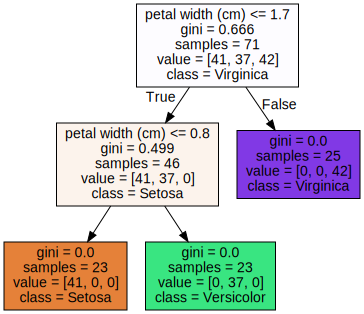

In [17]:
# Plot the smallest tree
graph = Source(export_graphviz(rfClassMdl.estimators_[index], out_file=None, feature_names=X_train.columns, filled=True, class_names=['Setosa', 'Versicolor','Virginica']))
SVG(graph.pipe(format='svg'))

In [18]:
smallest_tree = rfClassMdl.estimators_[index]

smallest_tree.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9333333333333333

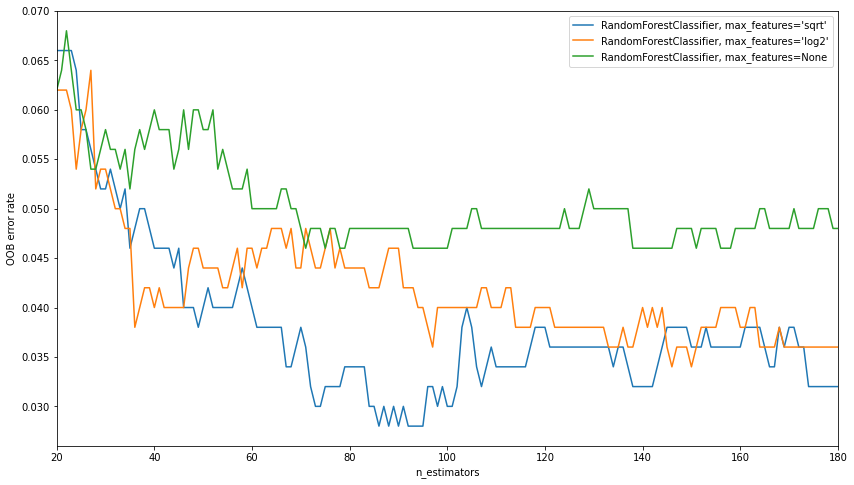

In [19]:
from collections import OrderedDict
from sklearn.datasets import make_classification

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=18)

clfs_cluster = [
    ("RandomForestClassifier, max_features='sqrt'",
        ensemble.RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=18)),
    ("RandomForestClassifier, max_features='log2'",
        ensemble.RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=18)),
    ("RandomForestClassifier, max_features=None",
        ensemble.RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=18))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in clfs_cluster)

# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 180

for label, clf in clfs_cluster:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(14,8))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# 2. Regression 

## Dataset for Regression



> **Dataset:**  [Boston house-price](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)



*   **Number of Instances:** 
    *   	506
*   **Number of Attributes:**
    *   13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

*   **Attribute Information:**
    *   CRIM per capita crime rate by town
    *   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    *   INDUS proportion of non-retail business acres per town
    *   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    *   NOX nitric oxides concentration (parts per 10 million)
    *   RM average number of rooms per dwelling
    *   AGE proportion of owner-occupied units built prior to 1940
    *   DIS weighted distances to five Boston employment centres
    *   RAD index of accessibility to radial highways
    *   TAX full-value property-tax rate per \$10,000
    *   PTRATIO pupil-teacher ratio by town
    *   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    *   LSTAT \% lower status of the population
    *   MEDV Median value of owner-occupied homes in \$1000’s








### 1. Load Data

In [21]:
#load data and see meta info
boston = datasets.load_boston()
dir(boston)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

### 2. Explore Data

In [22]:
# print type and shape of data
print(type(boston.data))
print(type(boston.target))

print(boston.data.shape)
print(boston.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


### 3. Create Panda Dataframe and do data manipulations

In [23]:
dfReg = pd.DataFrame(boston.data, columns=boston.feature_names)
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
# Add target data to the panda dataframe
dfReg['target'] = boston.target
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 4. Split the data for Training and Testing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dfReg.drop(['target'],axis='columns'),boston.target,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)

(455, 13)
(51, 13)


### 5. Initialise a Random Forest Regressor

In [26]:
rfRegressor = ensemble.RandomForestRegressor(n_estimators=200, # number of trees in the RFT
                                             criterion='squared_error', 
                                             max_depth=None, min_samples_split=2, 
                                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                             max_features='auto', max_leaf_nodes=None, 
                                             min_impurity_decrease=0.0, 
                                             bootstrap=True, oob_score=False, n_jobs=None, 
                                             random_state=2, verbose=0, warm_start=False)

# sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

# PARAMETERS
# n_estimators: int, default=100. The number of trees in the forest.
# criterion: The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
# min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
# max_features: The number of features to consider when looking for the best split.
# max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
# oob_score: Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
# n_jobs: The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
# random_state: Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 
# warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
# class_weight: Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
# ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.
# max_samples: If bootstrap is True, the number of samples to draw from X to train each base estimator.



> ***Let's dig into*** **[tree.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)**






### 6. Model Performance on Train data

In [27]:
CV_predicted = cross_val_predict(rfRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(rfRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)

Crossvalidation Coefficient of determination on training set : 0.8187230088105523


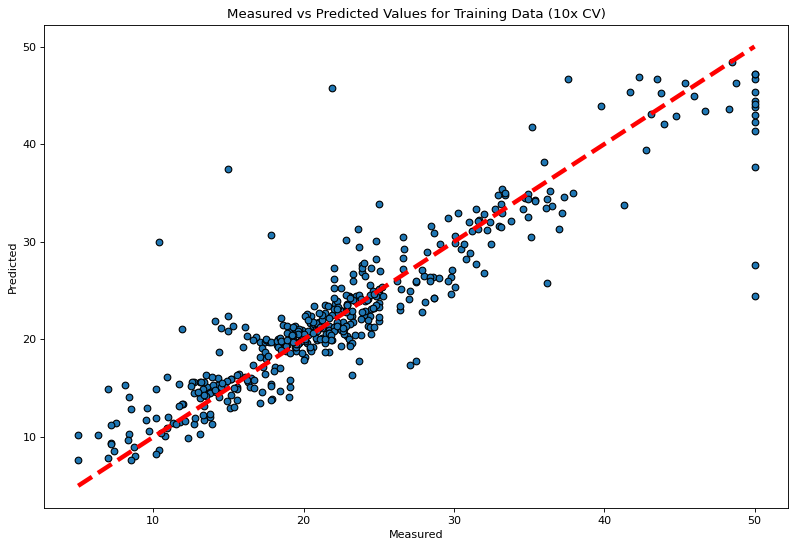

In [28]:
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7.  Let's fit the RF model on Training data and perform prediction with the Test data 

In [29]:
rfRegressor_model = rfRegressor.fit(X_train,y_train)

y_predicted = rfRegressor_model.predict(X_test)

### 8. Model Performance on Test data

In [30]:
r2_score = rfRegressor_model.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.7069937915762412

Mean Squared Error on test set : 25.205583647058848


### 9. Visualisation

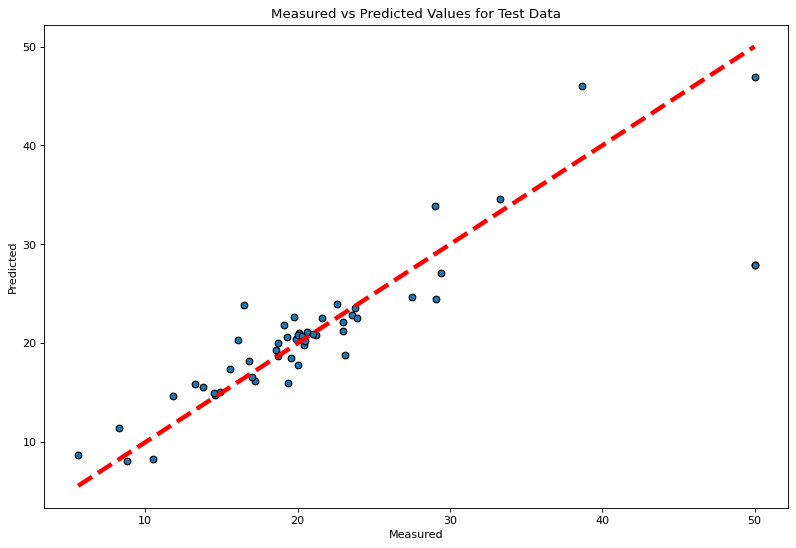

In [31]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()



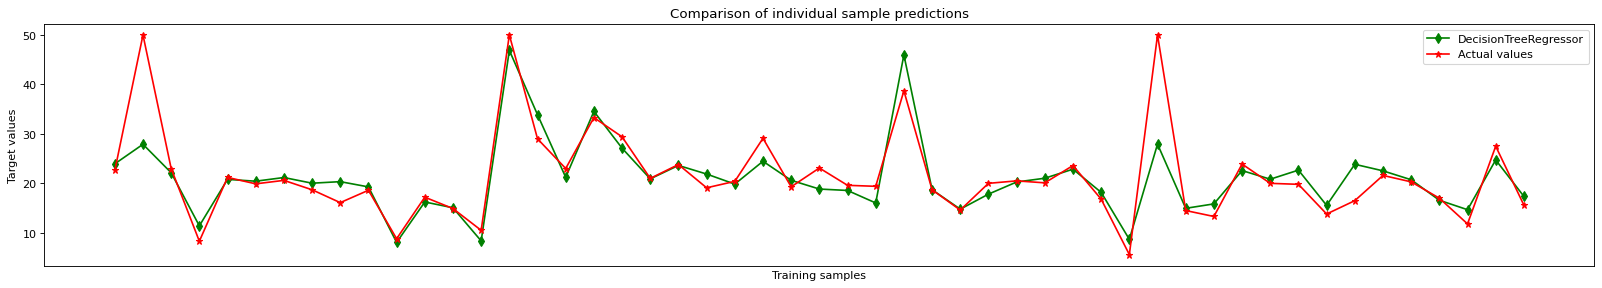

In [32]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='DecisionTreeRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

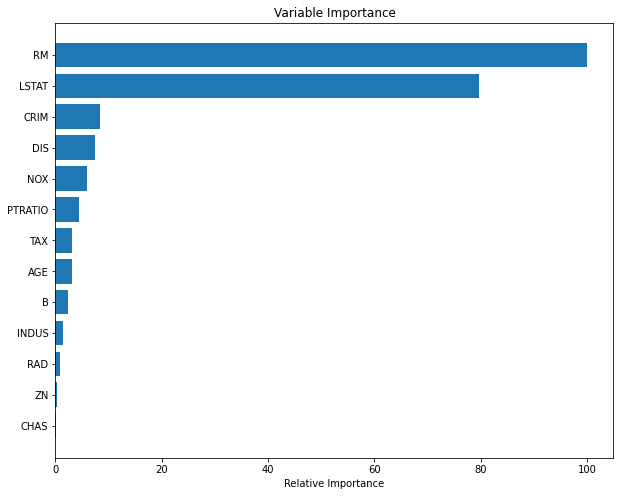

In [33]:
# #############################################################################
# Plot feature importance
feature_importance = rfRegressor_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()